In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,7)

### Montagem e envio da requisição

In [2]:
server_url = 'http://localhost/monopoly/run_games'

request_dict = {
  "random_seed": 0,
  "games_number": 300
}

r = requests.post(server_url, json=request_dict)

### Avaliação da resposta

In [3]:
print(r)

response = json.loads(r.text)

print(response)

<Response [200]>
{'n_timeout': 261, 'mean_rounds': 889, 'victory_percentage': {'impulsive': 39.0, 'cautious': 24.3, 'rigorous': 19.3, 'random': 17.3}, 'top_type': 'impulsive'}


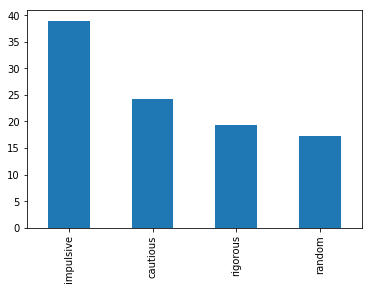

In [4]:
pd.Series(response['victory_percentage']).plot.bar();

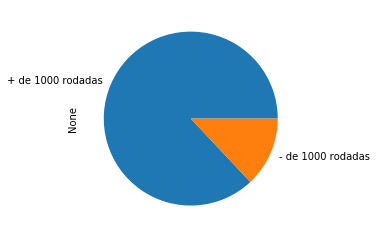

In [5]:
n_timeout = response['n_timeout']
n_not_timeout = request_dict['games_number'] - n_timeout
pd.Series([n_timeout,n_not_timeout], index=['+ de 1000 rodadas','- de 1000 rodadas']).plot.pie();